In [1]:
from config import opt
from PIL import Image
from propose import convert_image
import torch as t
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from utils import array_tool as at
from utils.vis_tool import vis_bbox
%matplotlib inline

successfuly convert img  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x7FAD28071790>


Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


[0]
[[  46.76239    0.       723.7405  1249.617  ]]


<AxesSubplot:>

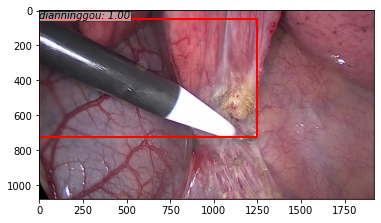

In [2]:
pre = Image.open(opt.pre_img)
post = Image.open(opt.post_img)

tempimg = convert_image(pre)
tempimg = t.from_numpy(tempimg)[None]

faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

trainer.load(
    '/home/tim/文档/Pytorch_ws/robotcv_pipeline/checkpoints/fasterrcnn_11252310_0.9529958677685952')
opt.caffe_pretrain = False  # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(
    tempimg, visualize=True)
print(_labels[0])
print(_bboxes[0])
vis_bbox(at.tonumpy(tempimg[0]),
            at.tonumpy(_bboxes[0]),
            at.tonumpy(_labels[0]).reshape(-1),
            at.tonumpy(_scores[0]).reshape(-1))
